# 6.1 ODE-1st Order
La forma general de una ODE de primer orden es $\dfrac{dx}{dt} = f(x,t)$ <br>

###### Euler's method
Podemos escribir $x(t+h) = x(t) + h \dfrac{dx}{dt} + O(h^2)$

Entonces, si calculamos $x$ en un tiempo $t$, podemos usar esta ecuacion y la ec. dif para calcular $x$ en un pequeno tiempo despues y asi. 


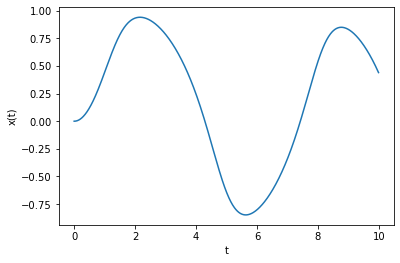

In [1]:
# Euler Method. 
# Solve dx/dt = -x^3 + sin t with x(0) = 0

import numpy as np
from matplotlib import pyplot as plt

def f(x,t):
    return(-x**3 + np.sin(t))

a = 0  #start of interval
b = 10 #end of interval
N = 1000  #number of steps
h = (b-a)/N   #size of step
x = 0   #initial condition

tpoints = np.arange(a,b,h)
xpoints=[]

for t in tpoints:
    xpoints.append(x)
    x += h * f(x,t)
    
plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()




##### Runge Kutta

It is really a set of methods. We have a first order and second order Runge Kutta method and others.
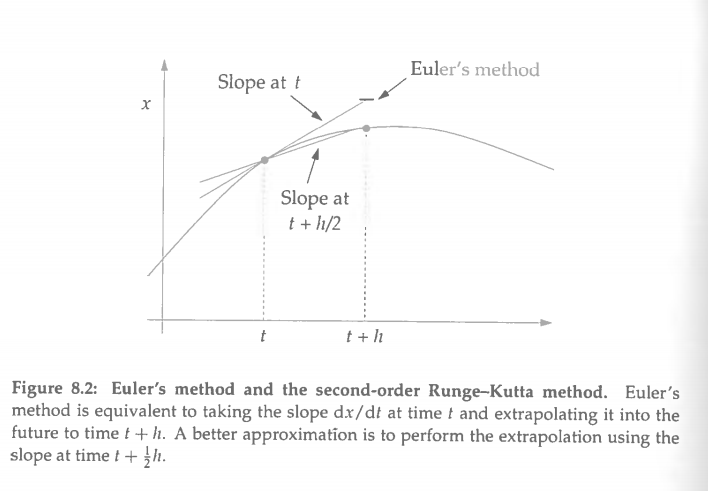

We perform a Taylor expansion around $t + 1/2 h$ to get the value of $x(t+h)$, thus:

$x(t+h) = x(t+1/2 h) + \dfrac{1}{2} h \left( \dfrac{dx}{dt} \right)_{t + 1/2h} + \dfrac{1}{8} h^2 \left( \dfrac{d^2 x}{dt^2} \right)_{t + 1/2 h} + O(h^3)$

Similarly, $x(t) = x(t+ \dfrac{1}{2} h) - \dfrac{1}{2} h \left( \dfrac{dx}{dt} \right)_{t + 1/2 h} + \dfrac{1}{8} h^2 \left( \dfrac{d^2 x}{dt^2} \right)_{t + 1/2} + O(h^3)$

We can substract and rearrange to get: 

$x(t+h) = x(t) + h \left( \dfrac{dx}{dt} \right)_{t + 1/2 h} + O(h^3) = x(t) + h f(x(t + 1/2 h), t + 1/2 h) + O(h^3)$

Though it is better, it requires knowing $x(t + 1/2 h)$, which we don't. We get around this by approximating $x(t + 1/2 h) = x(t) + \dfrac{1}{2} h f(x,t)$ (using Euler's method). <br>
The complet calculation for a single step is:

$k_1 = h f(x,t)$ <br>
$k_2 = h f(x+ \dfrac{1}{2} k_1 , t + \dfrac{1}{2} h )$ <br>
$x(t+h) = x(t) + k_2$

The first equation gives us the value of $k_1$, which inserted in the second equation gives the estimate for $x(t+1/2 h)$ and then the resulting $k_2$ is inserted in the third equation to get the estimate for $x(t+h)$

This is the __second order RK__

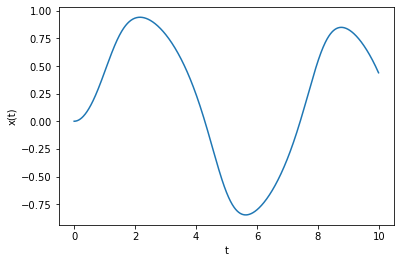

In [2]:
## Second order Runge Kutta

from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []

x = 0.0
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

##### Fourth order RK method

We take the approach further, we use more formulas to cancel out the $h^3$ and therefore use:

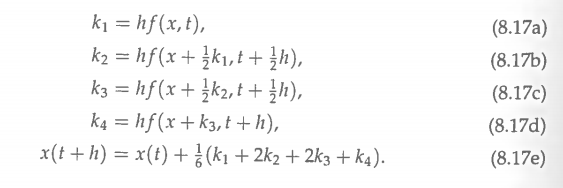

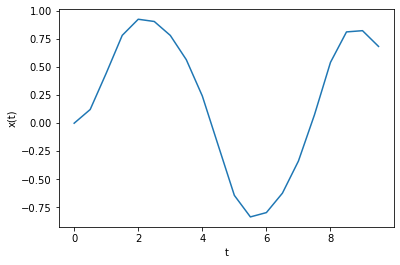

In [3]:
## 4th Order RK

from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 20
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

Solutions for infinite ranges

Suppose we want to find the solution all the way out to $t = \infty$. <br>
For this, we define $u = \dfrac{t}{1+t}$ or equivalently $t = \dfrac{u}{1-u}$

So as $t \rightarrow \infty$, we have $u \rightarrow 1$. Therefore, we can rewrite the equation $dx/dt = f(x,t)$ as $dx/du \; du/dt = f(x,t)$ <br>

So that $\dfrac{dx}{du} = \dfrac{dt}{du} f \left( x, \dfrac{u}{1-u} \right) = (1-u)^{-2} f \left( x, \dfrac{u}{1-u} \right)$ <br>

So, we define $g(x,u) = (1-u)^{-2} f \left( x, \dfrac{u}{1-u} \right)$ <br>
Then we have that the equation is $\dfrac{dx}{du} = g(x,u)$ and solve it until $u=1$

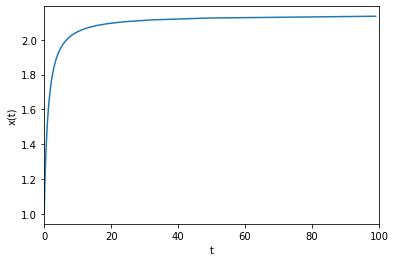

In [4]:
# suppose we want to solve dx / dt = 1 / (x^2 + t^2) 
# from t=0 to t = inf with x(t=0)=1
# We have that g(x,u) = (1-u)^(-2)  1 /(x^2 (1-u)^2 + u^2) 
# we solve it from u=0 to u =1 with x(u=0) = 1

from numpy import arange
from pylab import plot,xlabel,ylabel,xlim,show

def g(x,u):
    return 1/(x**2*(1-u)**2+u**2)

a = 0.0
b = 1.0
N = 100
h = (b-a)/N

upoints = arange(a,b,h)
tpoints = []
xpoints = []

x = 1.0
for u in upoints:
    tpoints.append(u/(1-u))
    xpoints.append(x)
    k1 = h*g(x,u)
    k2 = h*g(x+0.5*k1,u+0.5*h)
    k3 = h*g(x+0.5*k2,u+0.5*h)
    k4 = h*g(x+k3,u+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlim(0,100)
xlabel("t")
ylabel("x(t)")
show()